In [8]:
""" 
STORING CSV INTO MONGO AND CREATING A DFF AND DF 
"""

from pymongo import MongoClient
import dask.dataframe as dd
import dask.bag as bag
from dask_mongo import to_mongo, read_mongo
from dask.distributed import Client
import pandas as pd
import dask_mongo


host_uri = "mongodb+srv://..."


client = Client(processes=False)

df = dd.read_csv("Hotel_Reviews.csv")

b = bag.from_delayed(
    df.map_partitions(lambda x: x.to_dict(orient="records")).to_delayed()
)

# to_mongo(  ( works )
#     b,
#     connection_kwargs={"host": host_uri},
#     database="sentiment_analysis",
#     collection="reviews"
# ) 


# Read Dask Bag from Mongo database ( causes an error )
# b = dask_mongo.read_mongo(
#     database="sentiment_analysis",
#     collection="reviews",
#     connection_kwargs={"host": host_uri},
#     chunksize=2
# )


ddf = b.to_dataframe()

df = ddf.compute()

print(df)


c:\Users\Arttu\anaconda3\lib\site-packages\distributed\node.py:160: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 65209 instead
  warnings.warn(


                                            Hotel_Address  \
0        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
1        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
2        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
3        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
4        s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
...                                                   ...   
100550  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
100551  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
100552  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
100553  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   
100554  Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...   

        Additional_Number_of_Scoring Review_Date  Average_Score  \
0                                194    8/3/2017            7.7   
1                                194    8/3/2017            7.7   
2                                194   7/31/2017            7.7   

In [9]:
""" 
PLAYING AROUND WITH MONGO, STUDIO 3T, AGGREGATE FUNCTIONS ETC. GETTING NEW RESULTS AND USING THEM LATER 
"""

from pymongo import MongoClient
client = MongoClient("mongodb+srv://...")
db = client.sentiment_analysis
collection = db.reviews
data = pd.DataFrame(list(collection.find()))
print(data)

                             _id  \
0       62af547997a870c6b1baf665   
1       62af547997a870c6b1baf666   
2       62af547997a870c6b1baf667   
3       62af547997a870c6b1baf668   
4       62af547997a870c6b1baf669   
...                          ...   
515733  62af548f97a870c6b1c2a13e   
515734  62af548f97a870c6b1c2a140   
515735  62af548f97a870c6b1c2a142   
515736  62af548f97a870c6b1c2a144   
515737  62af548f97a870c6b1c2a146   

                                            Hotel_Address  \
0       Plaza Espa a 6 8 Sants Montju c 08014 Barcelon...   
1       Plaza Espa a 6 8 Sants Montju c 08014 Barcelon...   
2       Plaza Espa a 6 8 Sants Montju c 08014 Barcelon...   
3       Plaza Espa a 6 8 Sants Montju c 08014 Barcelon...   
4       Plaza Espa a 6 8 Sants Montju c 08014 Barcelon...   
...                                                   ...   
515733  Avenida Diagonal 1 Sant Mart 08019 Barcelona S...   
515734  Avenida Diagonal 1 Sant Mart 08019 Barcelona S...   
515735  Avenida Di

In [10]:
""" 
VISUALISATIONS / DASH DASHBOARD 
"""

import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
from dash.dependencies import Input, Output

app = dash.Dash(__name__)
df = df.head(50000)

onlyParis=df[df['Hotel_Address'].str.contains('Paris') == True]

print(onlyParis)
# Get one review per hotel, hence getting unique hotels
hotelsdf = onlyParis.drop_duplicates(subset=['Hotel_Name'])
print(hotelsdf)
hotelsdf = hotelsdf.drop_duplicates()

scatterplot = px.scatter(hotelsdf, y="Reviewer_Score", x="Reviewer_Nationality")

px.set_mapbox_access_token("pk.eyJ1IjoiYXJ0dHVhIiwiYSI6ImNsNGx0MGpjMTFid2EzanBmYm8xY25mbjEifQ.23I_Cdnze1SbuMDPVjkAEw")


fig = px.scatter_mapbox(hotelsdf, lat="lat", lon="lng", color="Hotel_Name", hover_name="Hotel_Name",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=10)


app.layout = html.Div([
    html.H1('Hotel Reviews Dashboard'),
    dcc.Tabs([
        dcc.Tab(label='Tab one', children=[
            dcc.Graph(id="graph",
                figure=scatterplot
            )
        ]),
        dcc.Tab(label='Tab two', children=[
            dcc.Graph(id="map",
                figure=fig
            )
        ]),
    ]),
     
    html.Div(id='tabs-content')
])

if __name__ == '__main__':
    app.run_server(debug=True, use_reloader=False)

C:\Users\Arttu\AppData\Local\Temp/ipykernel_21604/3711471857.py:12: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
  import dash_core_components as dcc
C:\Users\Arttu\AppData\Local\Temp/ipykernel_21604/3711471857.py:13: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`
  import dash_html_components as html


                                         Hotel_Address  \
3778   1 3 Rue d Argentine 16th arr 75116 Paris France   
3779   1 3 Rue d Argentine 16th arr 75116 Paris France   
3780   1 3 Rue d Argentine 16th arr 75116 Paris France   
3781   1 3 Rue d Argentine 16th arr 75116 Paris France   
3782   1 3 Rue d Argentine 16th arr 75116 Paris France   
...                                                ...   
49572      14 Rue Stanislas 6th arr 75006 Paris France   
49573      14 Rue Stanislas 6th arr 75006 Paris France   
49574      14 Rue Stanislas 6th arr 75006 Paris France   
49575      14 Rue Stanislas 6th arr 75006 Paris France   
49576      14 Rue Stanislas 6th arr 75006 Paris France   

       Additional_Number_of_Scoring Review_Date  Average_Score  \
3778                             26   6/29/2017            8.4   
3779                             26   4/25/2017            8.4   
3780                             26   4/18/2017            8.4   
3781                             26  11

In [11]:
""" 
ASSIGNMENT 1 DONE WITH DASK + SVM, LOGREG AND MULTINOMIAL NAIVE BAYES IMPLEMENTED WITH DASK
for in-memory problems, just use scikit-learn
for large moels, use dask_ml.joblib and your favorite scikit-learn estimator
for large datasets, use dask_ml estimators
"""

from dask.dataframe import from_pandas
import dask.dataframe as dd


df=ddf
 
reviewsDF = df[['Negative_Review','Positive_Review']]

posReviews = reviewsDF[['Positive_Review']]
negReviews = reviewsDF[['Negative_Review']]

posReviews=posReviews.rename(columns={"Positive_Review": "Review"})
negReviews=negReviews.rename(columns={"Negative_Review": "Review"})
 
posReviews=posReviews.assign(Positive=1)  
negReviews=negReviews.assign(Positive=0)


reviews=negReviews.append(posReviews)

reviews = reviews.shuffle(on=["Positive","Review"],compute=True)
reviews = reviews.reset_index(drop=True)
reviews = reviews.sample(frac=1)

df = reviews.compute()

In [12]:
""" 
WRITING OWN REVIEWS FOR THE DATAFRAME
"""

Review1 = "Staying in this hotel made me sick for two weeks, still have not recovered"
Review2 = "Positively surprised of the service I received. I especially liked the front desk clerks"
Review3 = "As expected. Nothing fancy but not too bad either. Would recommend for bigger families. Not gonna stay again though"

first = { "Review": Review1, "Positive": 0 }
second = { "Review": Review2,  "Positive": 1 }
third = { "Review": Review3,  "Positive": 0 }

allReviews = [first,second,third]
ownReviewsDF = pd.DataFrame(allReviews)

ddf = from_pandas(ownReviewsDF, npartitions=3)

reviews=ddf.append(reviews)

reviews = reviews.shuffle(on=["Positive","Review"],compute=True)
reviews = reviews.reset_index(drop=True)
reviews = reviews.sample(frac=1)


print(reviews.compute())

                                                   Review  Positive
80467              Staff very attentive superb experience         1
18463    The rooms and shower was excellent The servic...         1
48105    The staff were not friendly and the breakfast...         0
11774    Very comfortable bed Nice shower lots of hot ...         1
32714    We had 2 stays in this Hotel over the 2 weeks...         0
...                                                   ...       ...
124906                                        No Negative         0
30075                                             nothing         0
205736                                        No Positive         1
232643   Location is excellent walking distance to man...         1
88196                                         No Negative         0

[1031479 rows x 2 columns]


In [65]:
""" 
CLEANING THE DATAFRAME DATA
"""
df = reviews.compute()

import pandas as pd
import numpy as np
import re
import pandas as pd
import time
import dask.dataframe as ddf

def remove_specials(text):
    return re.sub('\W+', ' ', text)

t0 = time.time()

def clean_text(df):
    df["Review"] = df.Review.map(lambda text:text.lower()).map(remove_specials).apply(lambda i: ' '.join(filter(lambda j: len(j) > 3, i.split())))
    return df   

df = clean_text(df)
t1 = time.time()
print("Time to process without Dask {}".format(t1-t0))

dask_dataframe = ddf.from_pandas(df, npartitions=6)

t0 = time.time()
result = dask_dataframe.map_partitions(clean_text, meta=df)
df = result.compute()
t1 = time.time()
print("Time to process with Dask {}".format(t1-t0))
print(df)

Time to process without Dask 16.183445692062378
Time to process with Dask 14.63386607170105
                                                   Review  Positive
0                 minute wait breakfast arrived breakfast         0
0       expected nothing fancy either would recommend ...         0
0                 staff could have been more enthusiastic         0
0       great location very accommodating staff beauti...         1
0       positively surprised service received especial...         1
...                                                   ...       ...
248862                                     friendly staff         1
248863  well located visiting main attractions great b...         1
248864  slow wifi rooms access cards need multiple att...         0
248865  great location fond walking basically walk eve...         1
248866  good position staff helpful unusual good break...         1

[1031479 rows x 2 columns]


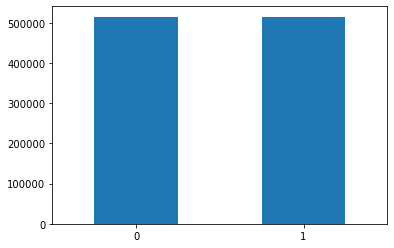

The distribution of positive and negative reviews:
0    0.5
1    0.5
Name: Positive, dtype: float64
Pos and Neg combined:


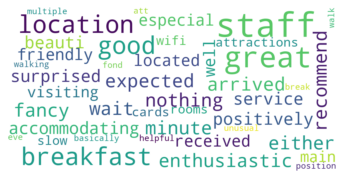

Positive reviews:


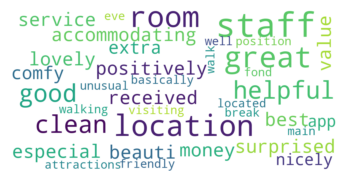

Negative reviews:


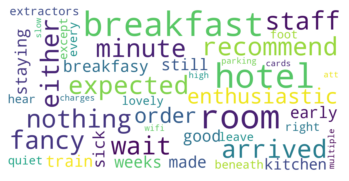

In [66]:
""" 
CREATING A BARCHART AND A WORDCLOUD
"""

import matplotlib.pyplot as plt


ax = df['Positive'].value_counts().plot.bar(rot=0)
plt.show()

print("The distribution of positive and negative reviews:") 
print(df["Positive"].value_counts(normalize = True))

from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

swords = ["based","need","could","range","offer","fairly","nights","attentiv","putney","fri","pool","f","booking","tube","com","Length","the","at","cl","i","dtype","object","o","Review","and","th","it","Name","our","dad",
"seating","we","shuttle","access","wit","or","of","ran","for","my","went","testing","was","after","to","very","but","with","without","late",
"grea","robes","no","king","slept","work","would","had","are","not","one","r","bed","a","all","plugs","though","t","on","previo","in","didn","junior","from","were","help","even"]
swords = swords + stopwords.words('english')

def show_wordcloud(data):
    wordcloud = WordCloud(
        stopwords = swords,
        background_color = 'white',
        max_words = 50,
        max_font_size = 40,
        scale = 3,
        random_state = 42,
        min_word_length = 3
    ).generate(str(data))

    plt.axis('off')
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.show()

dfPos = df[df['Positive'] == 1]
dfNeg = df[df['Positive'] == 0]

print("Pos and Neg combined:")
show_wordcloud(df["Review"])

print("Positive reviews:")
show_wordcloud(dfPos["Review"])

print("Negative reviews:")
show_wordcloud(dfNeg["Review"])



In [67]:
""" 
TRAIN ONE MODEL FROM PREVIOUS WITH DASK 
"""
#•	Implement one or two of the models from assignment 1 with pandas replaced by Dask.

from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=20, max_df=0.95, ngram_range=(1,1), stop_words='english', strip_accents='ascii',lowercase=True)

ddf=result
df=df
df = df.head(1000)

X=vectorizer.fit_transform(df["Review"])

print("X:")
print(X)

print(result.compute())
# X = df["Review"]
y= df["Positive"]

print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=0)

from sklearn.svm import SVC

model= SVC(random_state=0)
model.fit(X_train, y_train)

model.score(X, y)

model = SVC(C=0.00001, shrinking=False, random_state=0)
model.fit(X, y)
# much worse
model.score(X, y)

from sklearn.model_selection import GridSearchCV
estimator = SVC(gamma='auto', random_state=0, probability=True)
param_grid = {
    'C': [0.001, 10.0],
    'kernel': ['rbf', 'poly'],
}

grid_search = GridSearchCV(estimator, param_grid, verbose=2, cv=2)
grid_search.fit(X, y)

grid_search.best_params_, grid_search.best_score_

# parallelize within sklearn
grid_search = GridSearchCV(estimator, param_grid, verbose=2, cv=2, n_jobs=-1)
grid_search.fit(X, y)
grid_search.best_params_, grid_search.best_score_

# parallellize with DASK
# follow insluctions to know what to pass to Client!
import joblib
import dask.distributed
c = dask.distributed.Client(processes=False)

param_grid = {
    'C': [0.001, 10.0],
    'kernel': ['rbf', 'poly']
}

grid_search = GridSearchCV(estimator, param_grid, verbose=2, cv=2, n_jobs=-1)

with joblib.parallel_backend("dask"):
    grid_search.fit(X, y)

grid_search.best_params_, grid_search.best_score_


                                                   Review  Positive
0                 minute wait breakfast arrived breakfast         0
0       expected nothing fancy either would recommend ...         0
0                 staff could have been more enthusiastic         0
0       great location very accommodating staff beauti...         1
0       positively surprised service received especial...         1
...                                                   ...       ...
248862                                     friendly staff         1
248863  well located visiting main attractions great b...         1
248864  slow wifi rooms access cards need multiple att...         0
248865  great location fond walking basically walk eve...         1
248866  good position staff helpful unusual good break...         1

[1031479 rows x 2 columns]
  (0, 550)	0.47721544446567116
  (0, 1077)	0.5048556279929597
  (0, 8981)	0.5109009622344517
  (0, 5177)	0.5063263979244788
  (1, 7840)	0.2108580889226573
 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 100)          7232600   
                                                                 
 flatten_1 (Flatten)         (None, 10000)             0         
                                                                 
 dense_3 (Dense)             (None, 1)                 10001     
                                                                 
Total params: 7,242,601
Trainable params: 10,001
Non-trainable params: 7,232,600
_________________________________________________________________
None
Epoch 1/6
5158/5158 [==============================] - 101s 19ms/step - loss: 0.2339 - acc: 0.9110 - val_loss: 0.2138 - val_acc: 0.9222
Epoch 2/6
5158/5158 [==============================] - 96s 19ms/step - loss: 0.2075 - acc: 0.9226 - val_loss: 0.2180 - val_acc: 0.9164
Epoch 3/6
5158/5158 [======

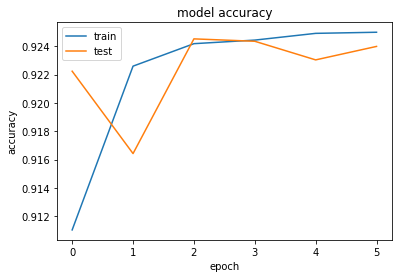

In [118]:
""" 
CNN 
"""

from keras.layers.convolutional import Conv1D
from keras.layers import GlobalMaxPooling1D
import matplotlib.pyplot as plt
from keras.preprocessing.text import one_hot
from keras_preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from tensorflow.keras.layers import Embedding
from sklearn.model_selection import train_test_split



X = reviews["Review"].compute()
y = reviews["Positive"].compute().head(1031476)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



max_words=5000

tokenizer = Tokenizer(num_words=max_words)

tokenizer.fit_on_texts(X_train)

X_train_tok = tokenizer.texts_to_sequences(X_train)
X_test_tok = tokenizer.texts_to_sequences(X_test)

maxlen = 100 

X_train_pad = pad_sequences(X_train_tok, padding='post', maxlen=maxlen)
X_test_pad = pad_sequences(X_test_tok, padding='post', maxlen=maxlen)

X_train[30]
X_train_tok[30]
X_train_pad[10]

# Adding 1 because of reserved 0 index
vocab_size = len(tokenizer.word_index) + 1

from numpy import array
from numpy import asarray
from numpy import zeros

glovefile ='glove.6B.100d.txt'
embeddings_dictionary = dict()
glove_file = open(glovefile, encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = asarray(records[1:], dtype='float32')
    embeddings_dictionary [word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

# create the model  NN  see sample code previous lesson
model = Sequential()
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], input_length=maxlen , trainable=False)
model.add(embedding_layer)
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
print(model.summary())

# Fit the model
history=model.fit(X_train_pad, y_train, batch_size=128, epochs=6, verbose=1,validation_split=0.2)

# Final evaluation of the model
score = model.evaluate(X_test_pad, y_test, verbose=1)

print(model.metrics_names)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

from matplotlib import pyplot as plt

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 100, 10)           723260    
                                                                 
 lstm (LSTM)                 (None, 67)                20904     
                                                                 
 dense_4 (Dense)             (None, 1)                 68        
                                                                 
Total params: 744,232
Trainable params: 744,232
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/3
5158/5158 [==============================] - 1536s 296ms/step - loss: 0.4862 - acc: 0.7805 - val_loss: 0.5027 - val_acc: 0.7720
Epoch 2/3
5158/5158 [==============================] - 1669s 324ms/step - loss: 0.4594 - acc: 0.8135 - val_loss: 0.5041 - val_acc: 0.7697
Epoch 3/3
6447/6447 [==========

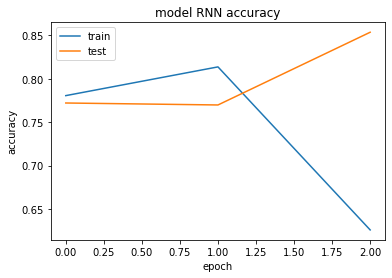

In [120]:
""" 
LSTM / RNN 
"""

from tensorflow.keras.layers import LSTM

modelRNN = Sequential()
modelRNN.add(Embedding(vocab_size, 10, input_length=maxlen))
modelRNN.add(LSTM(67))
modelRNN.add(Dense(1, activation='sigmoid'))
modelRNN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
print(modelRNN.summary())


history = modelRNN.fit(X_train_pad, y_train, batch_size=128, epochs=3, verbose=1, validation_split=0.2)

score = modelRNN.evaluate(X_test_pad, y_test, verbose=1)
print("Test Score:", score[0])
print("Test Accuracy:", score[1])

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])

plt.title('model RNN accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc = 'upper left')
plt.show()